In [1]:
from bs4 import BeautifulSoup
import os
import requests

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
url = "https://www.transfermarkt.us/heung-min-son/leistungsdatendetails/spieler/91845/plus/0?saison=&verein=&liga=&wettbewerb=GB1&pos=&trainer_id="
response = requests.get(url,headers=headers)
response.text[:100] # Access the HTML with the text property
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
div = soup.findAll('div', class_='responsive-table')[1]

In [4]:
table = div.find('table')

In [5]:
print(table.prettify())

<table>
 <thead>
  <tr>
   <th class="zentriert">
    Matchday
   </th>
   <th class="zentriert">
    Date
   </th>
   <th class="zentriert">
    Venue
   </th>
   <th class="zentriert" colspan="2">
    For
   </th>
   <th colspan="2">
    Opponent
   </th>
   <th class="zentriert">
    Result
   </th>
   <th class="zentriert">
    Pos.
   </th>
   <th class="zentriert">
    <span class="icons_sprite icon-tor-table-header" title="Goals">
    </span>
   </th>
   <th class="zentriert">
    <span class="icons_sprite icon-vorlage-table-header" title="Assists">
    </span>
   </th>
   <th class="zentriert">
    <span class="icons_sprite icon-gelbekarte-table-header" title="Yellow cards">
    </span>
   </th>
   <th class="zentriert">
    <span class="icons_sprite icon-gelbrotekarte-table-header" title="Second yellow cards">
    </span>
   </th>
   <th class="zentriert">
    <span class="icons_sprite icon-rotekarte-table-header" title="Red cards">
    </span>
   </th>
   <th class="rechts">


In [6]:
            index=0 
            n_columns = 0
            n_rows=0
            column_names = []

In [7]:
            match=[]
            date=[]
            venue=[]
            forr=[]
            opp=[]
            result=[]
            pos=[]
            goal=[]
            assist=[]

            yellow=[]
            yellow2=[]
            red=[]
           
            play=[]

In [8]:
            # Find number of rows and columns
            # we also find the column titles if we can
            for row in table.find_all('tr'):
                
                # Determine the number of rows in the table
                td_tags = row.find_all('td')
                if len(td_tags) > 0:
                    n_rows+=1
                    if n_columns == 0:
                        # Set the number of columns for our table
                        n_columns = len(td_tags)
                        
                # Handle column names if we find them
                th_tags = row.find_all('th') 
                if len(th_tags) > 0 and len(column_names) == 0:
                    for th in th_tags:
                      try:
                         column_names.append( th.find('span')['title'] ) 
                      except: 
                       column_names.append(th.get_text())
    
            
            
    
            columns = column_names if len(column_names) > 0 else range(0,n_columns)
            df = pd.DataFrame(columns = columns,
                              index= range(0,n_rows))
            
            for row in table.find_all('tr'):
                
                columns = row.find_all('td')
                
                
                if len(columns) >=13: 

                   match.append(columns[0].get_text().strip())
                   date.append(columns[1].get_text().strip())
                   venue.append(columns[2].get_text().strip())
                   forr.append(columns[3].find('img', class_='tiny_wappen')['alt'].strip().split(' ')[0])
                   opp.append(columns[6].get_text().strip().split('(')[0])
                   result.append(columns[7].get_text().strip())
                   pos.append(columns[8].get_text().strip())
                   goal.append(columns[9].get_text().strip().split(' ')[0])
                   assist.append(columns[10].get_text().strip())
                   
                   yellow.append(columns[11].get_text().strip().split("'")[0])
                   yellow2.append(columns[12].get_text().strip().split("'")[0])
                   red.append(columns[13].get_text().strip().split("'")[0])
                   
                   play.append(columns[14].get_text().strip().split("'")[0])
                   

In [9]:
columns = column_names if len(column_names) > 0 else range(0,n_columns)
df = pd.DataFrame(columns = columns,
                              index= range(0,len(match)))


In [10]:
df['Matchday']=match
df['Assists']=assist

df['Date']=date
df['Red cards']=red
df['Yellow cards']=yellow
df['Minutes played']=play
df['Venue']=venue
df['For']=forr
df['Opponent']=opp
df['Goals']=goal
df['Pos.']=pos
df['Second yellow cards']=yellow2



df['Result']=result

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Matchday             164 non-null    object
 1   Date                 164 non-null    object
 2   Venue                164 non-null    object
 3   For                  164 non-null    object
 4   Opponent             164 non-null    object
 5   Result               164 non-null    object
 6   Pos.                 164 non-null    object
 7   Goals                164 non-null    object
 8   Assists              164 non-null    object
 9   Yellow cards         164 non-null    object
 10  Second yellow cards  164 non-null    object
 11  Red cards            164 non-null    object
 12  Minutes played       164 non-null    object
dtypes: object(13)
memory usage: 16.8+ KB


In [12]:
df['Yellow cards'].sum()


'42287615'

In [13]:
df.to_csv ('compactMO',index=False)

**Change Goals to int and get sum**

In [14]:
#df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)
df['Goals']=df['Goals'].replace([''],'0')
df['Goals']=df['Goals'].astype(int)
df['Goals'].sum()




59

Convert Date to datetime

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Matchday             164 non-null    object        
 1   Date                 164 non-null    datetime64[ns]
 2   Venue                164 non-null    object        
 3   For                  164 non-null    object        
 4   Opponent             164 non-null    object        
 5   Result               164 non-null    object        
 6   Pos.                 164 non-null    object        
 7   Goals                164 non-null    int64         
 8   Assists              164 non-null    object        
 9   Yellow cards         164 non-null    object        
 10  Second yellow cards  164 non-null    object        
 11  Red cards            164 non-null    object        
 12  Minutes played       164 non-null    object        
dtypes: datetime64[ns](1), int64(1), obj

Change Minute Played to int

In [17]:
df['Minutes played']=df['Minutes played'].replace([''],'0')
df['Minutes played']=df['Minutes played'].astype(int)

Change Matchday to int

In [18]:
df['Matchday']=df['Matchday'].replace([''],'0')
df['Matchday']=df['Matchday'].astype(int)

**Change assist to int and get sum**

In [19]:
df['Assists']=df['Assists'].replace([''],'0')
df['Assists']=df['Assists'].astype(int)
df['Assists'].sum()


34

Change Yellow cards to int


In [20]:
df['Yellow cards']=df['Yellow cards'].replace([''],'0')


In [21]:
df['Yellow cards']=df['Yellow cards'].astype(int)
df['Yellow cards'].values[df['Yellow cards'].values > 0] =1


df['Yellow cards'].sum()

4

In [22]:
df.head(20)


,Matchday,Date,Venue,For,Opponent,Result,Pos.,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
0,5,2015-09-13,A,Tottenham,Sunderland,0:1,RW,0,0,0,,,62
1,6,2015-09-20,H,Tottenham,Crystal Palace,1:0,AM,1,0,0,,,79
2,7,2015-09-26,H,Tottenham,Man City,4:1,LW,0,0,0,,,77
3,12,2015-11-08,A,Tottenham,Arsenal,1:1,LW,0,0,0,,,15
4,13,2015-11-22,H,Tottenham,West Ham,4:1,RW,0,1,0,,,85
5,14,2015-11-29,H,Tottenham,Chelsea,0:0,LW,0,0,0,,,75
6,15,2015-12-05,A,Tottenham,West Brom,1:1,LW,0,0,0,,,25
7,16,2015-12-13,H,Tottenham,Newcastle,1:2,SS,0,0,0,,,21
8,17,2015-12-19,A,Tottenham,Southampton,0:2,,0,0,0,,,1
9,18,2015-12-26,H,Tottenham,Norwich,3:0,LW,0,0,0,,,11


Change second Yellow cards to int

In [23]:
df['Second yellow cards']=df['Second yellow cards'].replace([''],'0')
df['Second yellow cards']=df['Second yellow cards'].astype(int)
df['Second yellow cards'].values[df['Second yellow cards'].values > 0] =1

In [24]:
df.head()

,Matchday,Date,Venue,For,Opponent,Result,Pos.,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
0,5,2015-09-13,A,Tottenham,Sunderland,0:1,RW,0,0,0,0,,62
1,6,2015-09-20,H,Tottenham,Crystal Palace,1:0,AM,1,0,0,0,,79
2,7,2015-09-26,H,Tottenham,Man City,4:1,LW,0,0,0,0,,77
3,12,2015-11-08,A,Tottenham,Arsenal,1:1,LW,0,0,0,0,,15
4,13,2015-11-22,H,Tottenham,West Ham,4:1,RW,0,1,0,0,,85


Change Red Cards to int

In [25]:
df['Red cards']=df['Red cards'].replace([''],'0')
df['Red cards']=df['Red cards'].astype(int)
df['Red cards'].values[df['Red cards'].values > 0] =1

In [26]:
df.head()

,Matchday,Date,Venue,For,Opponent,Result,Pos.,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
0,5,2015-09-13,A,Tottenham,Sunderland,0:1,RW,0,0,0,0,0,62
1,6,2015-09-20,H,Tottenham,Crystal Palace,1:0,AM,1,0,0,0,0,79
2,7,2015-09-26,H,Tottenham,Man City,4:1,LW,0,0,0,0,0,77
3,12,2015-11-08,A,Tottenham,Arsenal,1:1,LW,0,0,0,0,0,15
4,13,2015-11-22,H,Tottenham,West Ham,4:1,RW,0,1,0,0,0,85


In [27]:
df['Pos.'].value_counts()

LW    77
CF    31
RW    25
SS    17
      10
AM     3
LM     1
Name: Pos., dtype: int64


Change CF and SS and AM to ST.
Change ' ' to  RW




In [31]:
df['Pos.']=df['Pos.'].replace([''],'CF')
df['Pos.']=df['Pos.'].replace(['SS'],'CF')




In [32]:
df['Pos.'].value_counts()

LW    77
CF    58
RW    25
AM     3
LM     1
Name: Pos., dtype: int64

Salah goals

In [33]:
df.groupby(['Opponent']).sum().sort_values(['Goals'],ascending=False)



,Matchday,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
Opponent,,,,,,,
Southampton,199,8,3,0,0,0,565
Bournemouth,184,5,2,1,0,1,581
Watford,202,5,1,0,0,0,594
Crystal Palace,182,5,0,0,0,0,593
Leicester,202,4,3,2,0,0,558
Everton,110,3,3,0,0,1,442
Stoke City,113,3,2,0,0,0,248
Newcastle,154,2,1,0,0,0,499
Middlesbrough,30,2,1,0,0,0,171





1.   Kane scored in every team he faced
2.   Salah Scored mostly  on  leicter then Arsenal and  Southampton









In [34]:
df[df['Venue'].values=='H'].groupby(['Venue','Opponent']).sum().sort_values(['Goals'],ascending=False)



Matchday  Goals  ...  Red cards  Minutes played
Venue Opponent                           ...                           
H     Crystal Palace          53      5  ...          0             349
      Southampton            108      3  ...          0             370
      Watford                126      3  ...          0             315
      Bournemouth             74      3  ...          0             341
      Huddersfield            63      2  ...          0              73
      Arsenal                155      1  ...          0             326
      Liverpool               36      1  ...          0             176
      Sheff Utd               12      1  ...          0              90
      Norwich                 42      1  ...          0             101
      Newcastle               78      1  ...          0             322
      Man City                73      1  ...          0             283
      Leicester              132      1  ...          0             283
      Swansea                 46      1  ...          0             220
      Everton                 57      1  ...          0             258
      Chelsea                 67      1  ...          1             238
      West Ham               113      1  ...          0             369
      Burnley                 53      1  ...          0             192
      Brighton                50      1  ...          0             180
      Stoke City              42      1  ...          0              90
      West Brom               69      0  ...          0              96
      Man Utd                147      0  ...          0             333
      Sunderland              27      0  ...          0              92
      Middlesbrough           24      0  ...          0              81
      Hull City               16      0  ...          0              16
      Cardiff                  8      0  ...          0              72
      Wolves                  20      0  ...          0              90

[26 rows x 7 columns]

In [35]:
df[df['Venue'].values=='A'].groupby(['Venue','Opponent']).sum().sort_values(['Goals'],ascending=False)

Matchday  Goals  ...  Red cards  Minutes played
Venue Opponent                           ...                           
A     Southampton             91      5  ...          0             195
      Leicester               70      3  ...          0             275
      Watford                 76      2  ...          0             279
      Everton                 53      2  ...          1             184
      Middlesbrough            6      2  ...          0              90
      Man Utd                 44      2  ...          0             282
      Aston Villa             26      2  ...          0              90
      Stoke City              71      2  ...          0             158
      Bournemouth            110      2  ...          1             240
      Chelsea                109      1  ...          0             284
      Swansea                 53      1  ...          0             180
      Cardiff                 21      1  ...          0              76
      Burnley                 76      1  ...          0             183
      West Ham                77      1  ...          0             200
      Newcastle               76      1  ...          0             177
      Man City               101      1  ...          0             284
      West Brom               60      0  ...          0              66
      Sunderland              28      0  ...          0             135
      Arsenal                 53      0  ...          0             277
      Sheff Utd               32      0  ...          0              90
      Norwich                 24      0  ...          0              70
      Liverpool              125      0  ...          0             349
      Hull City               38      0  ...          0              90
      Huddersfield            14      0  ...          0              93
      Crystal Palace         129      0  ...          0             244
      Brighton                49      0  ...          0             231
      Wolves                  28      0  ...          0             142

[27 rows x 7 columns]

kane never scored on Man city,Chelsea and Everton pitch


In [36]:
df.groupby(['Matchday']).sum().sort_values(['Goals'],ascending=False)

,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
Matchday,,,,,,
4,4,3,0,0,0,247
2,4,0,0,0,0,112
16,3,3,0,0,0,287
18,3,1,0,0,1,245
26,3,0,1,0,0,346
19,3,0,1,0,0,278
30,3,0,0,0,0,215
6,3,1,0,0,0,327
34,2,2,0,0,0,153


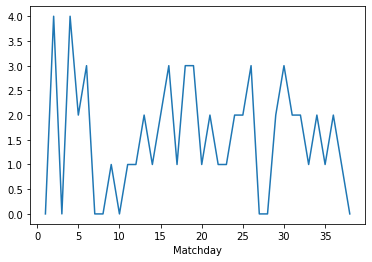

In [37]:
dfmatch=df.groupby(['Matchday'])['Goals'].sum()
dfmatch.plot(x ='Matchday', y='Goals', kind = 'line')
plt.show()


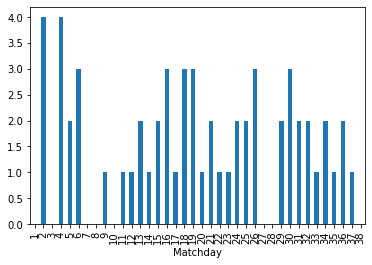

In [38]:
dfmatch.plot(x ='Matchday', y='Goals', kind = 'bar')
plt.show()

Kane never scored in round 8

> Indented block



> Indented block


Kane Most scored @ round 20,19,34,38 with 7 goals

In [39]:
df.groupby(df['Date'].dt.strftime('%B')).sum().sort_values(['Goals'],ascending=False)

,Matchday,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
Date,,,,,,,
December,455,14,9,1,0,1,1588
September,95,11,4,0,0,0,1293
April,662,6,3,0,0,0,1176
January,442,6,2,0,0,0,1277
February,415,5,1,2,0,0,1099
March,236,4,0,0,0,0,381
May,399,4,3,0,0,1,654
November,211,4,7,0,0,1,1071
October,100,3,2,1,0,0,819


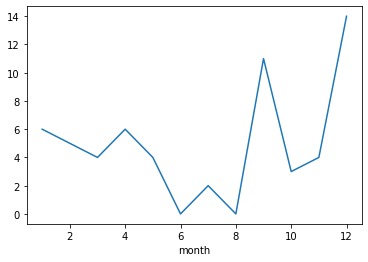

In [40]:

df['month'] = pd.DatetimeIndex(df['Date']).month
df2=df.groupby(df['month'])['Goals'].sum()
df2.plot(x ='month', y='Goals', kind = 'line')
plt.show()


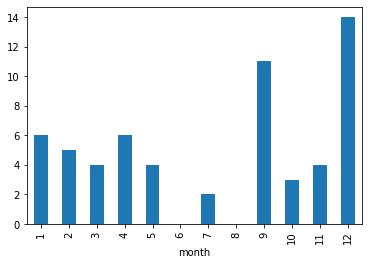

In [41]:
df2.plot(x ='month', y='Goals', kind = 'bar')
plt.show()

Salah scored in all months and mainly and December and November

In [42]:
df.groupby(df['Date'].dt.strftime('%d')).sum().sort_values(['Goals'],ascending=False)

,Matchday,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played,month
Date,,,,,,,,
20,45,5,0,0,0,0,281,30
02,289,4,3,0,0,0,905,63
03,116,4,3,0,0,1,383,42
08,97,4,2,0,0,0,242,32
04,147,3,2,0,0,1,468,33
05,182,3,0,0,0,0,489,62
26,169,3,2,1,0,0,446,69
24,19,3,0,0,0,0,168,20
10,102,3,1,1,0,0,270,28


Salah never scored on  day 15,28,6

Minutes/goal for liverpool


In [43]:
#df['Second yellow cards'].values[df['Second yellow cards'].values > 0] =1
df['Minutes played'].values[df['For']=='Tottenham'].sum()/df['Goals'].values[df['For']=='Tottenham'].sum()






174.91525423728814

Minutes/goal

In [44]:
df['Minutes played'].sum()/df['Goals'].sum()

174.91525423728814

In [45]:
df.to_csv ('compactMO',index=False)

In [46]:
df.groupby(['Matchday']).sum().sort_values(['Matchday'])

,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played,month
Matchday,,,,,,,
1,0,0,0,0,0,132,25
2,4,0,0,0,0,112,17
3,0,0,0,0,0,205,25
4,4,3,0,0,0,247,37
5,2,0,0,0,0,333,45
6,3,1,0,0,0,327,36
7,0,2,0,0,0,324,46
8,0,0,0,0,0,238,40
9,1,0,0,0,0,176,30


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Matchday             164 non-null    int64         
 1   Date                 164 non-null    datetime64[ns]
 2   Venue                164 non-null    object        
 3   For                  164 non-null    object        
 4   Opponent             164 non-null    object        
 5   Result               164 non-null    object        
 6   Pos.                 164 non-null    object        
 7   Goals                164 non-null    int64         
 8   Assists              164 non-null    int64         
 9   Yellow cards         164 non-null    int64         
 10  Second yellow cards  164 non-null    int64         
 11  Red cards            164 non-null    int64         
 12  Minutes played       164 non-null    int64         
 13  month                164 non-null  